Create a new notebook, knn_model, and work with the titanic dataset to answer the following:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import acquire as acq
import prepare as prep

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

- Fit a K-Nearest Neighbors classifier to your training sample and transform (i.e. make predictions on the training sample)

In [2]:
# Getting data

titanic = acq.get_titanic_data()
titanic = prep.prep_titanic(titanic)
train_titanic, validate_titanic, test_titanic = prep.split_data(titanic, 'survived')

train_titanic.head()

,survived,pclass,sex,sibsp,parch,fare,embarked,alone,sex_male,embarked_Q,embarked_S
passenger_id,,,,,,,,,,,
455,1,3,male,0,0,7.8958,C,1,1,0,0
380,1,1,female,0,0,227.5250,C,1,0,0,0
492,0,1,male,0,0,30.5000,S,1,1,0,1
55,1,1,male,0,0,35.5000,S,1,1,0,1
243,0,3,male,0,0,7.1250,S,1,1,0,1


In [57]:
# Splitting up the data and doing more cleaning. Initially, I had sent in all encoded variables as well, but the
# model performed poorly, so I removed the encoded embarkeds as well as sibsp and parch, since alone accounts for it.

X_train = train_titanic.drop(columns = ['survived','sex', 'embarked', 'embarked_Q', 'embarked_S', 'sibsp', 'parch'])
y_train = train_titanic.survived

X_validate = validate_titanic.drop(columns = ['survived','sex', 'embarked', 'embarked_Q', 'embarked_S', 'sibsp', 'parch'])
y_validate = validate_titanic.survived

X_test = test_titanic.drop(columns = ['survived','sex', 'embarked', 'embarked_Q', 'embarked_S', 'sibsp', 'parch'])
y_test = test_titanic.survived

In [58]:
X_train.head()

,pclass,fare,alone,sex_male
passenger_id,,,,
455,3,7.8958,1,1
380,1,227.5250,1,0
492,1,30.5000,1,1
55,1,35.5000,1,1
243,3,7.1250,1,1


In [59]:
# Create the KNN object. Leaving it to default of 5.

t_knn = KNeighborsClassifier()

In [60]:
import warnings
warnings.filterwarnings("ignore")

In [61]:
t_knn.fit(X_train, y_train)
t_knn.score(X_train, y_train) # Pretty high score.

0.8127340823970037

In [62]:
y_pred5 = t_knn.predict(X_train)

pd.DataFrame({'predict': y_pred5[:20],
             'actual': y_train.head(20)})

,predict,actual
passenger_id,,
455,0,1
380,1,1
492,1,0
55,0,1
243,0,0
314,0,0
300,1,1
488,0,0
707,1,1


- Evaluate your results using the model score, confusion matrix, and classification report.

In [65]:
t_knn.score(X_train, y_train)

0.8127340823970037

In [66]:
TN, FP, FN, TP = confusion_matrix(y_train, y_pred5).ravel()
all_ = TN + FP + FN + TP

pd.DataFrame(confusion_matrix(y_train, y_pred5)
             , index = ['not_survived_actual', 'survived_actual']
             , columns = ['not_survived_predict', 'survived_predict']
            )

,not_survived_predict,survived_predict
not_survived_actual,279,50
survived_actual,50,155


In [67]:
print(classification_report(y_train, y_pred5))

              precision    recall  f1-score   support

           0       0.85      0.85      0.85       329
           1       0.76      0.76      0.76       205

    accuracy                           0.81       534
   macro avg       0.80      0.80      0.80       534
weighted avg       0.81      0.81      0.81       534



In [68]:
cr = classification_report(y_train, y_pred5, output_dict=True)
cr

{'0': {'precision': 0.8480243161094225,
  'recall': 0.8480243161094225,
  'f1-score': 0.8480243161094225,
  'support': 329},
 '1': {'precision': 0.7560975609756098,
  'recall': 0.7560975609756098,
  'f1-score': 0.7560975609756099,
  'support': 205},
 'accuracy': 0.8127340823970037,
 'macro avg': {'precision': 0.8020609385425161,
  'recall': 0.8020609385425161,
  'f1-score': 0.8020609385425161,
  'support': 534},
 'weighted avg': {'precision': 0.8127340823970037,
  'recall': 0.8127340823970037,
  'f1-score': 0.8127340823970037,
  'support': 534}}

In [70]:
t_knn.score(X_validate, y_validate)

# Difference in scores between in-sample and out-sample is 0.8127 - 0.7696 = 0.0431... that's all right.

0.7696629213483146

- Print and clearly label the following: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.


In [71]:
print(f'Accuracy for KNN with K=5 is: {cr["accuracy"]}')
print(f'TP rate for KNN with K=5 is: {TP / all_}')
print(f'FP rate for KNN with K=5 is: {FP / all_}')
print(f'TN rate for KNN with K=5 is: {TN / all_}')
print(f'FN rate for KNN with K=5 is: {FN / all_}')
print(f'Precision for KNN with K=5 is: {cr["1"]["precision"]}')
print(f'Recall for KNN with K=5 is: {cr["1"]["recall"]}')
print(f'F1-score for KNN with K=5 is: {cr["1"]["f1-score"]}')
print(f'Support for KNN with K=5 is: {[cr["1"]["support"], cr["0"]["support"]]}')

Accuracy for KNN with K=5 is: 0.8127340823970037
TP rate for KNN with K=5 is: 0.2902621722846442
FP rate for KNN with K=5 is: 0.09363295880149813
TN rate for KNN with K=5 is: 0.5224719101123596
FN rate for KNN with K=5 is: 0.09363295880149813
Precision for KNN with K=5 is: 0.7560975609756098
Recall for KNN with K=5 is: 0.7560975609756098
F1-score for KNN with K=5 is: 0.7560975609756099
Support for KNN with K=5 is: [205, 329]


- Run through steps 1-3 setting k to 10


In [72]:
t_knn10 = KNeighborsClassifier(n_neighbors=10)

t_knn10.fit(X_train, y_train)
print(f'In-sample accuracy score: {t_knn10.score(X_train, y_train)}')
print(f'Out-sample accuracy score: {t_knn10.score(X_validate, y_validate)}')
print(f'Score difference: {t_knn10.score(X_train, y_train) - t_knn10.score(X_validate, y_validate)}')

# Doesn't seem to perform that much better.

In-sample accuracy score: 0.7865168539325843
Out-sample accuracy score: 0.7303370786516854
Score difference: 0.0561797752808989


In [73]:
y_pred10 = t_knn10.predict(X_train)

pd.DataFrame({'predict': y_pred10[:20],
             'actual': y_train.head(20)})

,predict,actual
passenger_id,,
455,0,1
380,1,1
492,1,0
55,0,1
243,0,0
314,0,0
300,1,1
488,0,0
707,1,1


In [74]:
TN10, FP10, FN10, TP10 = confusion_matrix(y_train, y_pred10).ravel()
all_ = TN10 + FP10 + FN10 + TP10

pd.DataFrame(confusion_matrix(y_train, y_pred10)
             , index = ['not_survived_actual', 'survived_actual']
             , columns = ['not_survived_predict', 'survived_predict']
            )

,not_survived_predict,survived_predict
not_survived_actual,282,47
survived_actual,67,138


In [75]:
print(classification_report(y_train, y_pred10))

              precision    recall  f1-score   support

           0       0.81      0.86      0.83       329
           1       0.75      0.67      0.71       205

    accuracy                           0.79       534
   macro avg       0.78      0.77      0.77       534
weighted avg       0.78      0.79      0.78       534



In [76]:
cr10 = classification_report(y_train, y_pred10, output_dict=True)
cr10

{'0': {'precision': 0.8080229226361032,
  'recall': 0.8571428571428571,
  'f1-score': 0.8318584070796461,
  'support': 329},
 '1': {'precision': 0.745945945945946,
  'recall': 0.6731707317073171,
  'f1-score': 0.7076923076923077,
  'support': 205},
 'accuracy': 0.7865168539325843,
 'macro avg': {'precision': 0.7769844342910246,
  'recall': 0.7651567944250871,
  'f1-score': 0.7697753573859769,
  'support': 534},
 'weighted avg': {'precision': 0.7841918735322039,
  'recall': 0.7865168539325843,
  'f1-score': 0.7841916460788889,
  'support': 534}}

In [77]:
print(f'Accuracy for KNN with K=10 is: {cr10["accuracy"]}')
print(f'TP rate for KNN with K=10 is: {TP10 / all_}')
print(f'FP rate for KNN with K=10 is: {FP10 / all_}')
print(f'TN rate for KNN with K=10 is: {TN10 / all_}')
print(f'FN rate for KNN with K=10 is: {FN10 / all_}')
print(f'Precision for KNN with K=10 is: {cr10["1"]["precision"]}')
print(f'Recall for KNN with K=10 is: {cr10["1"]["recall"]}')
print(f'F1-score for KNN with K=10 is: {cr10["1"]["f1-score"]}')
print(f'Support for KNN with K=10 is: {[cr10["1"]["support"], cr10["0"]["support"]]}')

Accuracy for KNN with K=10 is: 0.7865168539325843
TP rate for KNN with K=10 is: 0.25842696629213485
FP rate for KNN with K=10 is: 0.08801498127340825
TN rate for KNN with K=10 is: 0.5280898876404494
FN rate for KNN with K=10 is: 0.1254681647940075
Precision for KNN with K=10 is: 0.745945945945946
Recall for KNN with K=10 is: 0.6731707317073171
F1-score for KNN with K=10 is: 0.7076923076923077
Support for KNN with K=10 is: [205, 329]


- Run through steps 1-3 setting k to 20


In [79]:
t_knn20 = KNeighborsClassifier(n_neighbors=20)

t_knn20.fit(X_train, y_train)
print(f'In-sample accuracy score: {t_knn20.score(X_train, y_train)}')
print(f'Out-sample accuracy score: {t_knn20.score(X_validate, y_validate)}')
print(f'Score difference: {t_knn20.score(X_train, y_train) - t_knn20.score(X_validate, y_validate)}')

# This one is also kinda all right in terms of fit.

In-sample accuracy score: 0.7490636704119851
Out-sample accuracy score: 0.702247191011236
Score difference: 0.04681647940074907


In [80]:
y_pred20 = t_knn20.predict(X_train)

pd.DataFrame({'predict': y_pred20[:20],
             'actual': y_train.head(20)})

,predict,actual
passenger_id,,
455,0,1
380,1,1
492,0,0
55,0,1
243,0,0
314,0,0
300,1,1
488,0,0
707,0,1


In [81]:
TN20, FP20, FN20, TP20 = confusion_matrix(y_train, y_pred20).ravel()
all_ = TN20 + FP20 + FN20 + TP20

pd.DataFrame(confusion_matrix(y_train, y_pred20)
             , index = ['not_survived_actual', 'survived_actual']
             , columns = ['not_survived_predict', 'survived_predict']
            )

,not_survived_predict,survived_predict
not_survived_actual,279,50
survived_actual,84,121


In [82]:
print(classification_report(y_train, y_pred20))

              precision    recall  f1-score   support

           0       0.77      0.85      0.81       329
           1       0.71      0.59      0.64       205

    accuracy                           0.75       534
   macro avg       0.74      0.72      0.72       534
weighted avg       0.75      0.75      0.74       534



In [83]:
cr20 = classification_report(y_train, y_pred20, output_dict=True)
cr20

{'0': {'precision': 0.768595041322314,
  'recall': 0.8480243161094225,
  'f1-score': 0.8063583815028901,
  'support': 329},
 '1': {'precision': 0.7076023391812866,
  'recall': 0.5902439024390244,
  'f1-score': 0.6436170212765957,
  'support': 205},
 'accuracy': 0.7490636704119851,
 'macro avg': {'precision': 0.7380986902518003,
  'recall': 0.7191341092742234,
  'f1-score': 0.7249877013897429,
  'support': 534},
 'weighted avg': {'precision': 0.7451802399385863,
  'recall': 0.7490636704119851,
  'f1-score': 0.7438827656856797,
  'support': 534}}

In [84]:
print(f'Accuracy for KNN with K=20 is: {cr20["accuracy"]}')
print(f'TP rate for KNN with K=20 is: {TP20 / all_}')
print(f'FP rate for KNN with K=20 is: {FP20 / all_}')
print(f'TN rate for KNN with K=20 is: {TN20 / all_}')
print(f'FN rate for KNN with K=20 is: {FN20 / all_}')
print(f'Precision for KNN with K=20 is: {cr20["1"]["precision"]}')
print(f'Recall for KNN with K=20 is: {cr20["1"]["recall"]}')
print(f'F1-score for KNN with K=20 is: {cr20["1"]["f1-score"]}')
print(f'Support for KNN with K=20 is: {[cr20["1"]["support"], cr20["0"]["support"]]}')

Accuracy for KNN with K=20 is: 0.7490636704119851
TP rate for KNN with K=20 is: 0.22659176029962547
FP rate for KNN with K=20 is: 0.09363295880149813
TN rate for KNN with K=20 is: 0.5224719101123596
FN rate for KNN with K=20 is: 0.15730337078651685
Precision for KNN with K=20 is: 0.7076023391812866
Recall for KNN with K=20 is: 0.5902439024390244
F1-score for KNN with K=20 is: 0.6436170212765957
Support for KNN with K=20 is: [205, 329]


- What are the differences in the evaluation metrics? Which performs better on your in-sample data? Why?


In [85]:
pd.DataFrame({'K-test': [5, 10, 20],
              'In-Sample Score': [t_knn.score(X_train, y_train),
                                 t_knn10.score(X_train, y_train),
                                 t_knn20.score(X_train, y_train)],
              'Out-Sample Score': [t_knn.score(X_validate, y_validate),
                                  t_knn10.score(X_validate, y_validate),
                                  t_knn20.score(X_validate, y_validate)],
              'Difference': [ t_knn.score(X_train, y_train) - t_knn.score(X_validate, y_validate),
                             t_knn10.score(X_train, y_train) - t_knn10.score(X_validate, y_validate),
                            t_knn20.score(X_train, y_train) - t_knn20.score(X_validate, y_validate)]
    
}) # Apologies for the lack of variable assignment. I'm too lazy and there's already too many variables floating 
# around already.

,K-test,In-Sample Score,Out-Sample Score,Difference
0,5,0.812734,0.769663,0.043071
1,10,0.786517,0.730337,0.056180
2,20,0.749064,0.702247,0.046816


In [ ]:
# Looks like just the very first one was the best, and also had the smallest difference. It might be because once 
# you start increasing the number of neighbors, the data gets noisier, and starts making predictions on variables
# that don't actually affect the target. 

- Which model performs best on our out-of-sample data from validate?

In [86]:
# Ah, I thought the previous question was what this was asking. Look above. 

# Do one final test to see how my K=5 model performs.

t_knn.score(X_test, y_test) # Not the best, yet not the worst. Pretty close to validation score. Looks good.

0.7597765363128491

In [100]:
# Just running through other k-values out of curiosity. 

scores = pd.DataFrame({})

for x in range(1,21):
    t_knn = KNeighborsClassifier(n_neighbors=x)
    t_knn.fit(X_train, y_train)
    train_score = t_knn.score(X_train, y_train)
    validate_score = t_knn.score(X_validate, y_validate)
    score_diff = train_score - validate_score
    score = pd.DataFrame({'neighbors': [x],
            'train_score': [train_score],
            'validate_score': [validate_score],
            'score_diff': [score_diff]})
    scores = pd.concat([scores, score])

scores = scores.reset_index(drop=True)
scores.sort_values('score_diff')

,neighbors,train_score,validate_score,score_diff
6,7,0.797753,0.764045,0.033708
4,5,0.812734,0.769663,0.043071
19,20,0.749064,0.702247,0.046816
10,11,0.782772,0.735955,0.046816
15,16,0.760300,0.707865,0.052434
7,8,0.794007,0.741573,0.052434
5,6,0.805243,0.752809,0.052434
9,10,0.786517,0.730337,0.056180
8,9,0.794007,0.735955,0.058052
17,18,0.762172,0.702247,0.059925


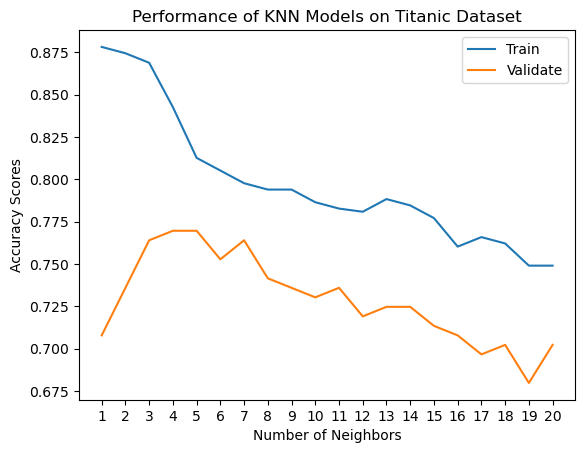

In [99]:
plt.plot(scores.neighbors, scores.train_score, label='Train')
plt.plot(scores.neighbors, scores.validate_score, label='Validate')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy Scores')
plt.title('Performance of KNN Models on Titanic Dataset')
plt.xticks(ticks=range(1,21));

In [ ]:
# Yeah, the above sort of proves that 5, maybe 7 neighbors would be the best fit for this model.